In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib notebook

In [3]:
#Set up environemnt
import sys
#Append PLATUS libraries if these are not set in your PYTHONPATH 
#sys.path.append('/home/jl12e12/PLATUS/')
#sys.path.append('/home/jl12e12/PLATUS/fortran/lib/')
import lib_hipstar as lh
import tools
import lines as l
import numpy as np
import matplotlib.pyplot as plt
from matplotlib2tikz import save as tikz_save
tikz=True
pdf=True
import os

import matplotlib
from mpl_toolkits.axes_grid1 import make_axes_locatable
import gc

from mpl_toolkits.mplot3d import axes3d

In [4]:
import lib_subspaces as lsub

In [5]:
cd ~/HPT_500k/HPT_LS20_DOM80_TI20/Subspaces/

/mnt/drive2/re_500k/HPT_LS20_DOM80_TI20/Subspaces


In [6]:
%%time
blocks=[1]
n_bl=len(blocks)
start_TS=5175601
stop_TS= 5265101
inc_TS=500
steps=range(start_TS,stop_TS,inc_TS)
turned_1=lsub.subspace('TURNED',21,start_TS,blocks,source_folder='./')
turned_1.load_grid()
turned_1.load_data(steps,read_all=True)

The dataset requires 14712.272644 Mb of RAM
CPU times: user 3min 43s, sys: 53.2 s, total: 4min 36s
Wall time: 5min 36s


In [7]:
tau_w=lsub.subspace('WALL_SH_HEAT',20,start_TS,blocks,source_folder='./')
tau_w.load_grid()
tau_w.load_data(steps,read_all=True)

The dataset requires 4904.090881 Mb of RAM


<IPython.core.display.Javascript object>


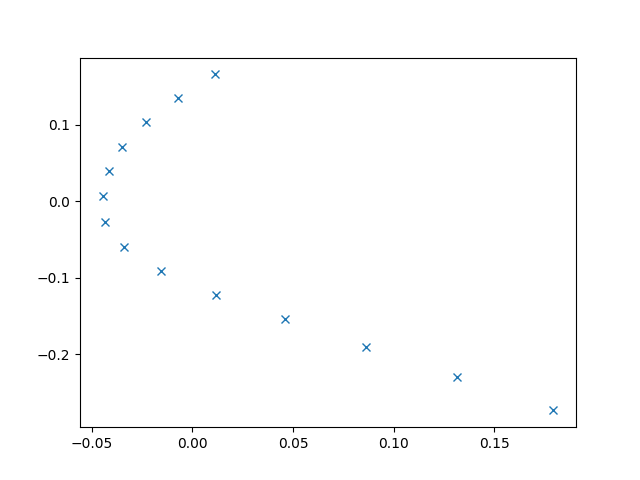

In [8]:
plt.figure()
for ib in range(n_bl):
    plt.plot(turned_1.grid[ib][0,0,:,0],turned_1.grid[ib][1,0,:,0],'x')

# Get mean Flow Field

In [9]:
turned_mean=[]
for ib in range(n_bl):
    nx,ny,nz=turned_1.header[0][ib]
    turned_mean.append(np.empty([nx,ny,2]))
    for i,j in enumerate([[2,4],[3,5]]):
        turned_mean[ib][:,:,i]=turned_1.data[ib][j[0],0,:,:,0]-turned_1.data[ib][j[1],0,:,:,0]

<IPython.core.display.Javascript object>


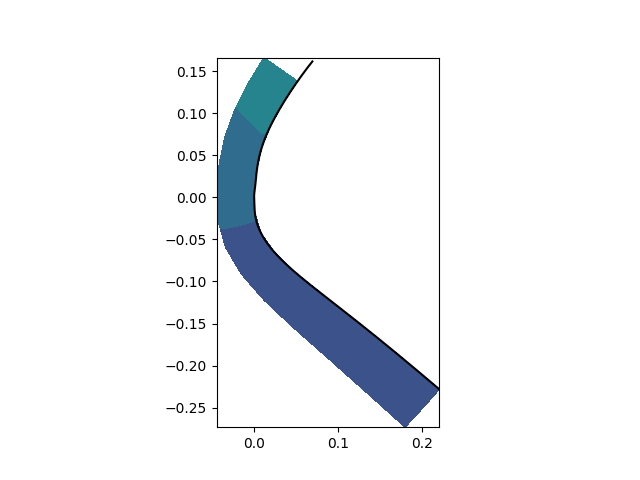

In [10]:
plt.figure()
plt.axes(aspect=1.)
for ib in range(n_bl):
    plt.plot(tau_w.grid[ib][0,0,:,0],tau_w.grid[ib][1,0,:,0],'k')
    plt.contourf(turned_1.grid[ib][0,:,:,0],turned_1.grid[ib][1,:,:,0],turned_mean[ib][:,:,0],levels=np.linspace(-3,7.,11))

<IPython.core.display.Javascript object>


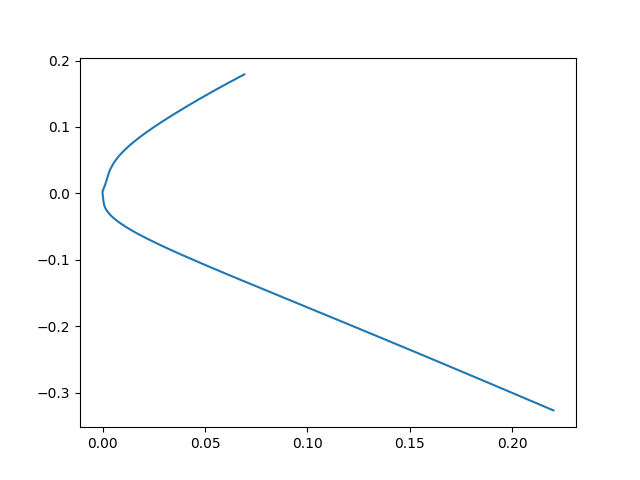

Leading edge index 124


In [11]:
plt.figure()
dist=[]
dist_red=[]
for ib in range(n_bl):
    nx,ny,nz=tau_w.header[0][ib]
    dist.append(np.empty(ny))
    dist_red.append(np.empty(ny/16))
    if ib==0:
        dist[ib][0]=0.
    else:
        dist[ib][0]=dist[ib-1][-1]
    for j in range(1,ny):
        dist[ib][j]=dist[ib][j-1]+np.sqrt((tau_w.grid[ib][0,0,j,0]-tau_w.grid[ib][0,0,j-1,0])**2
                                         +(tau_w.grid[ib][1,0,j,0]-tau_w.grid[ib][1,0,j-1,0])**2)
    if ib==0:
        temp1=100.
        for j in range(ny):
            if tau_w.grid[ib][0,0,j,0]<temp1:
                i_min=j
                temp1=tau_w.grid[ib][0,0,j,0]
        temp1=dist[ib][i_min]
        dist[ib][:]-=temp1
    dist_red[ib][:]=dist[ib][0:-1:16]
    plt.plot(tau_w.grid[ib][0,0,:,0],dist[ib])
print 'Leading edge index %i'%i_min    

In [ ]:
# fig=plt.figure()
# ax = fig.add_subplot(1, 1, 1, projection='3d')
# ax.set_aspect(1.)
# ax.view_init(azim=-45, elev=30)
# for ib in range(n_bl):
#     nx,ny,nz=tau_w.header[0][ib]      
#     ax.plot_surface(tau_w.grid[ib][0,0,:,:],tau_w.grid[ib][2,0,:,:],tau_w.grid[ib][1,0,:,:],color='b'
#                 ,rstride=10, cstride=10, alpha=0.3)   
#     ax.set_xlim([-0.1,1.1])
#     ax.set_ylim([-1.1,0.5])    
#     nx,ny,nz=turned_1.header[0][ib]  
#     for j in range(0,ny):
#         ax.plot_surface(turned_1.grid[ib][0,:,j,:],turned_1.grid[ib][2,:,j,:],turned_1.grid[ib][1,:,j,:],color='k'
#                 ,rstride=10, cstride=10, alpha=0.3)
#         ax.plot_surface(turned_1.grid[ib][0,:,j,:],turned_1.grid[ib][2,:,j,:],turned_1.grid[ib][1,:,j,:],color='k'
#                 ,rstride=10, cstride=10, alpha=0.3)
#     extents = np.array([getattr(ax, 'get_{}lim'.format(dim))() for dim in 'xyz'])
#     sz = extents[:,1] - extents[:,0]
#     centers = np.mean(extents, axis=1)
#     maxsize = max(abs(sz))
#     r = maxsize/2
#     for ctr, dim in zip(centers, 'xyz'):
#         getattr(ax, 'set_{}lim'.format(dim))(ctr - r, ctr + r)
#     plt.savefig('planes_considered.pdf')

<IPython.core.display.Javascript object>


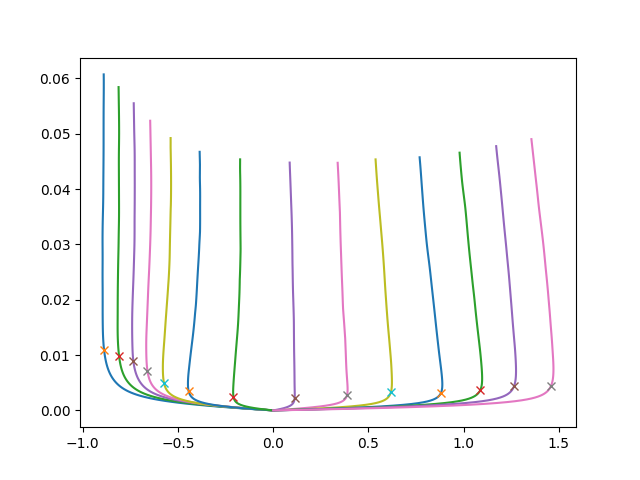

In [12]:
j=8
ib=0
bl_ind=[]
u_t_max=[]
for ib in range(n_bl):
    nx,ny,nz=turned_1.header[0][ib]
    temp=[]
    temp_u=[]
    plt.figure()
    for j in range(ny):
        temp1=np.argmax(np.abs(turned_mean[ib][:,j,0]))
        for i in range(nx):
            if abs(turned_mean[ib][nx-i-1,j,0])>0.99*abs(turned_mean[ib][temp1,j,0]):
                temp.append(nx-i-1)
                temp_u.append(turned_mean[ib][nx-i-1,j,0])
                break
        plt.plot(turned_mean[ib][:,j,0],turned_1.data[ib][1,0,:,j,0])
        plt.plot(turned_mean[ib][temp[-1],j,0],turned_1.data[ib][1,0,temp[-1],j,0],'x')   
    bl_ind.append(temp)
    u_t_max.append(temp_u)

<IPython.core.display.Javascript object>


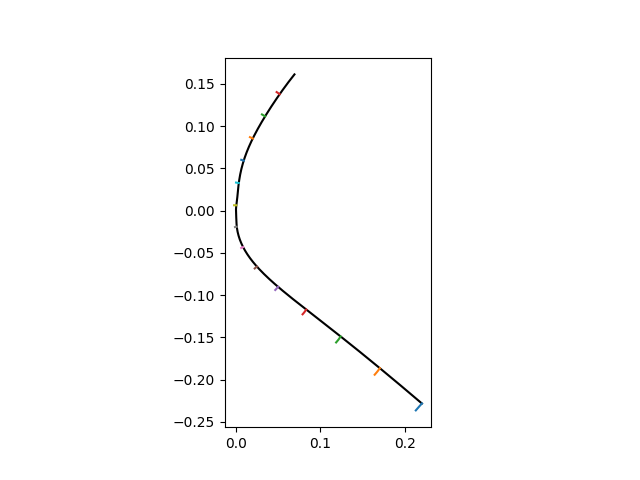

In [13]:
plt.figure()
plt.axes(aspect=1.)
for ib in range(n_bl):
    nx,ny,nz=turned_1.header[0][ib]
    plt.plot(tau_w.grid[ib][0,0,:,0],tau_w.grid[ib][1,0,:,0],'k')
    for j in range(ny):
        plt.plot(turned_1.grid[ib][0,bl_ind[ib][j]:,j,0],turned_1.grid[ib][1,bl_ind[ib][j]:,j,0])        

<IPython.core.display.Javascript object>


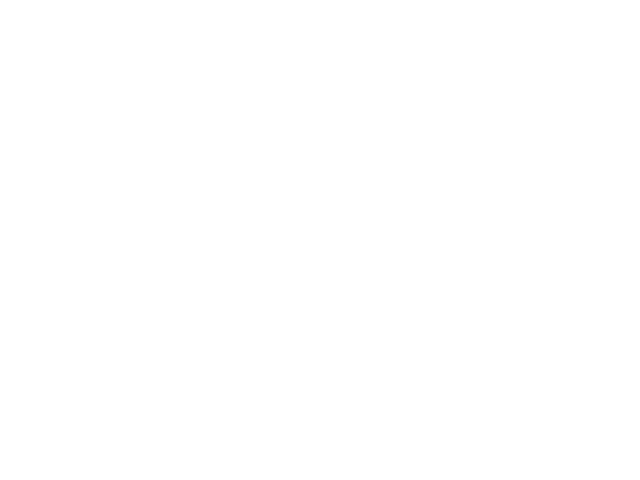

<IPython.core.display.Javascript object>


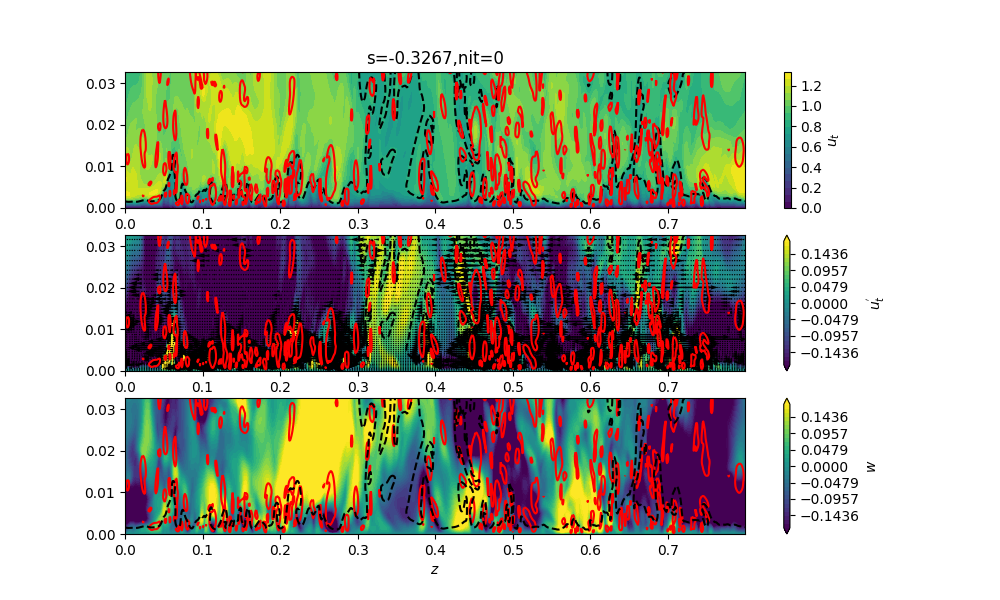

<IPython.core.display.Javascript object>


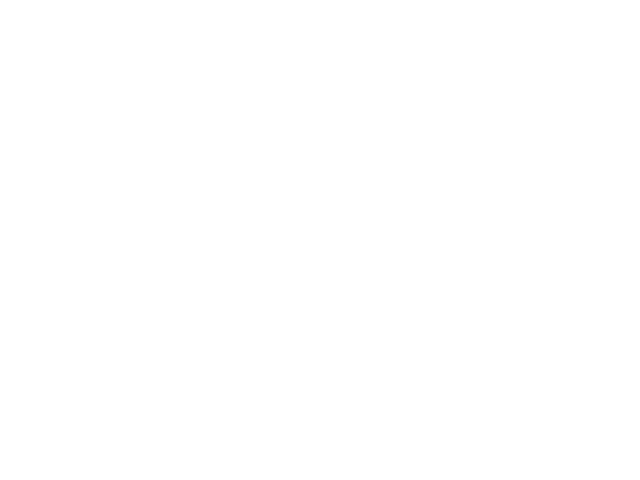

<IPython.core.display.Javascript object>


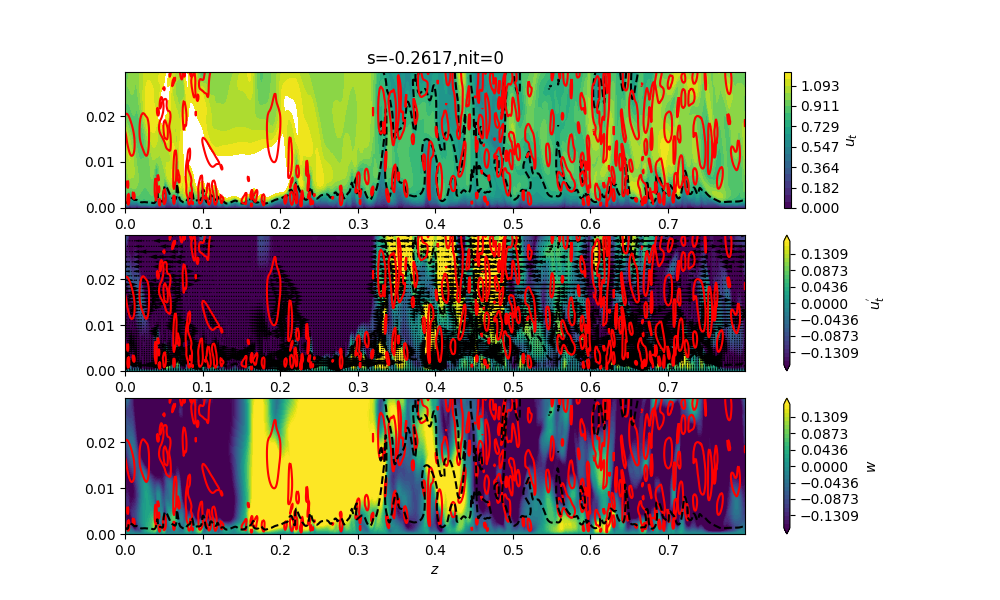

<IPython.core.display.Javascript object>


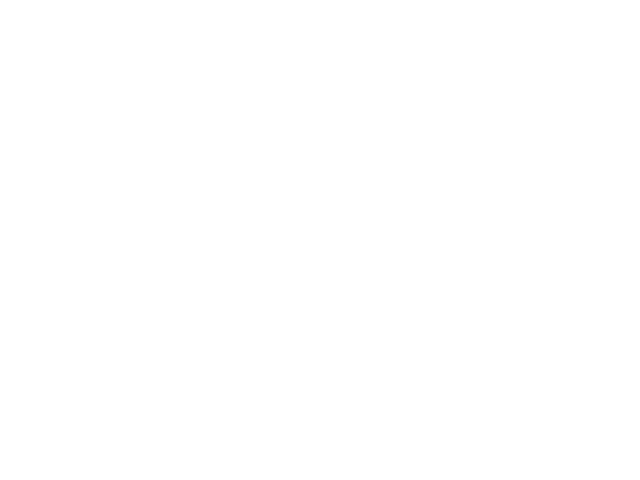

<IPython.core.display.Javascript object>


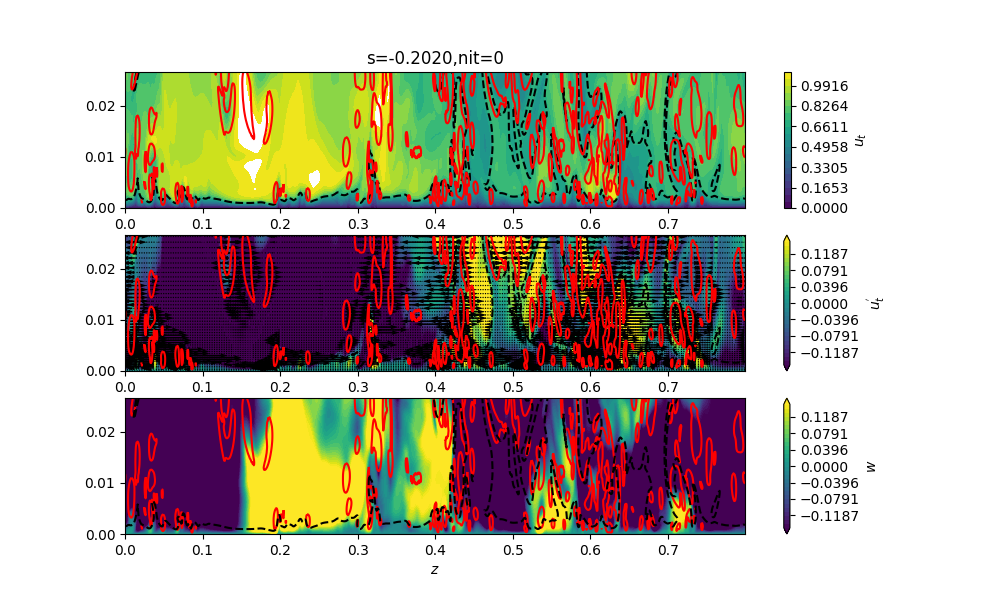

<IPython.core.display.Javascript object>


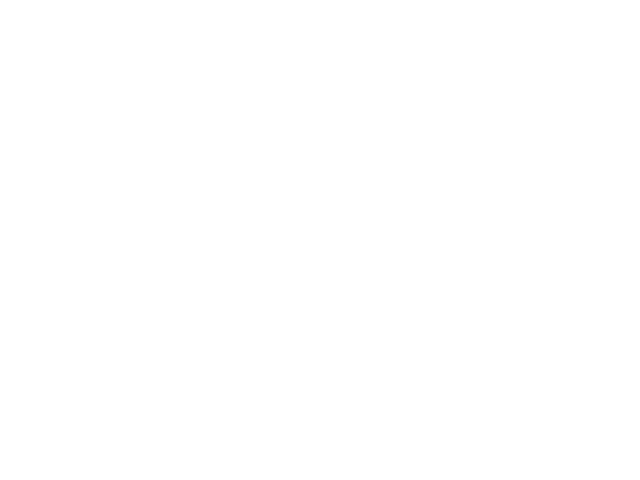

<IPython.core.display.Javascript object>


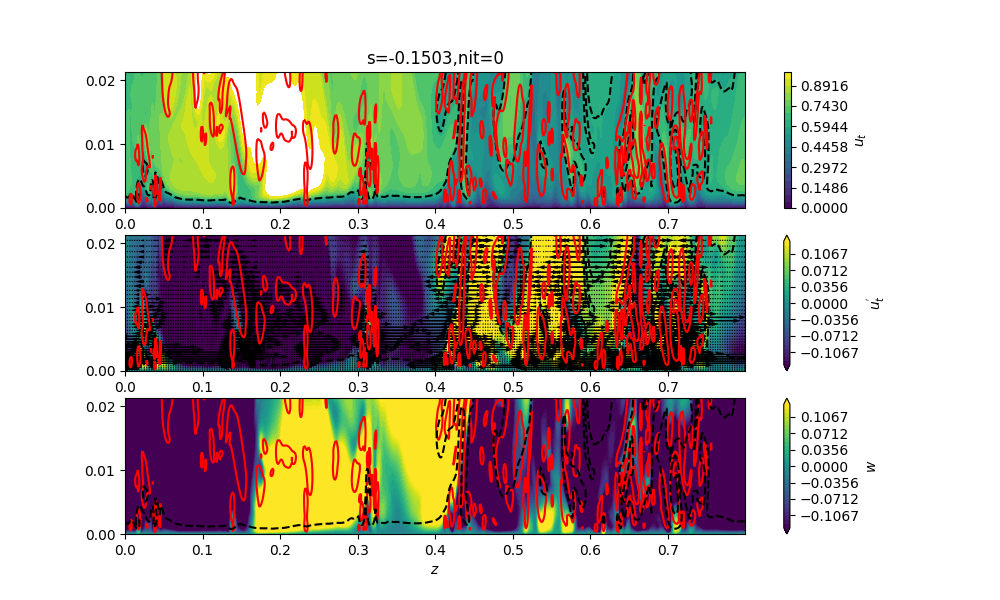

<IPython.core.display.Javascript object>


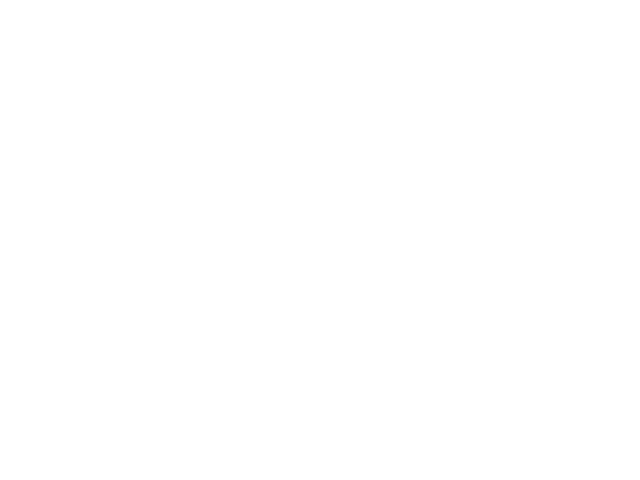

<IPython.core.display.Javascript object>


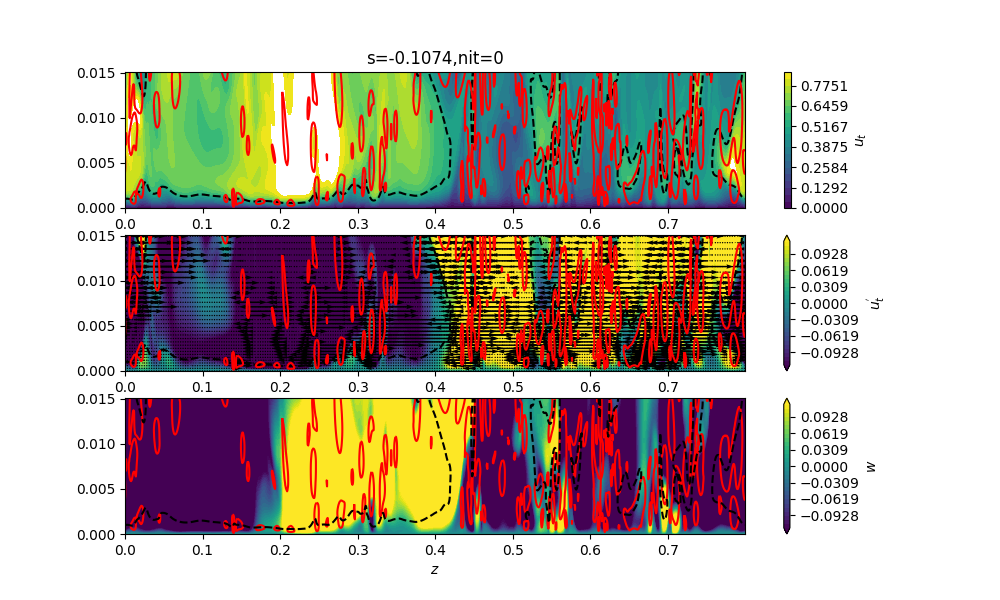

<IPython.core.display.Javascript object>


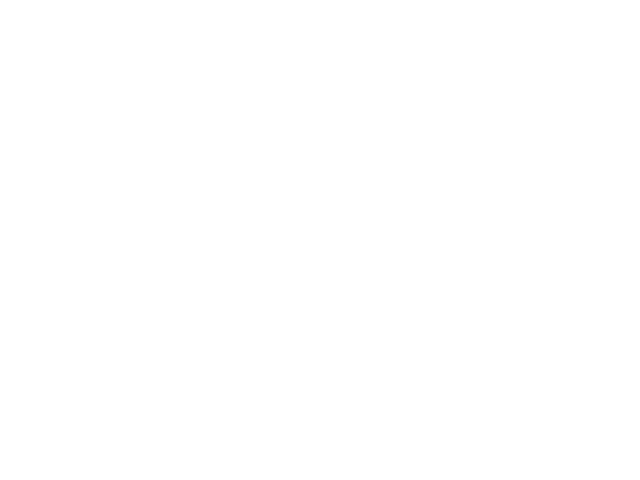

<IPython.core.display.Javascript object>


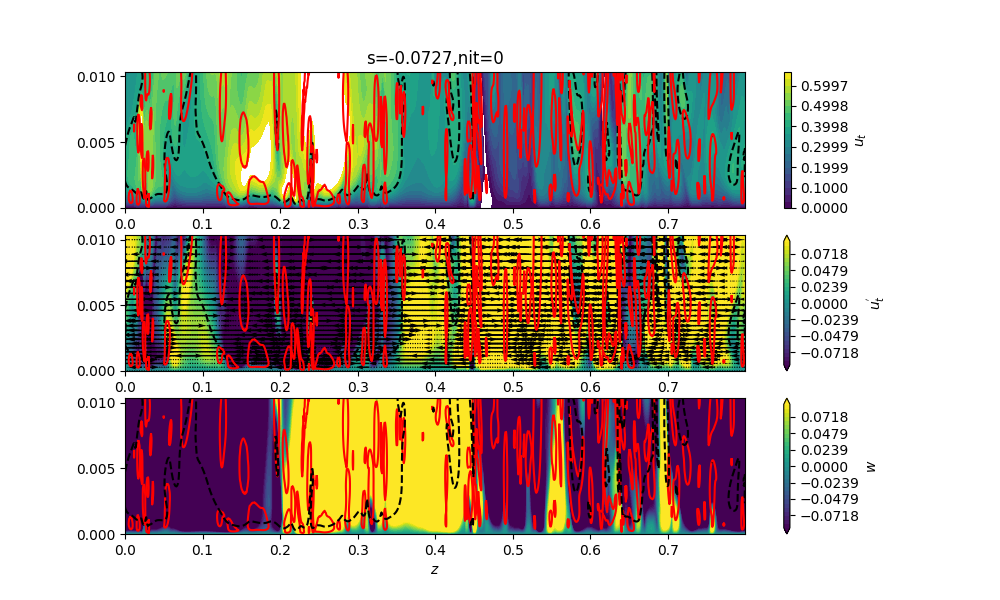

<IPython.core.display.Javascript object>


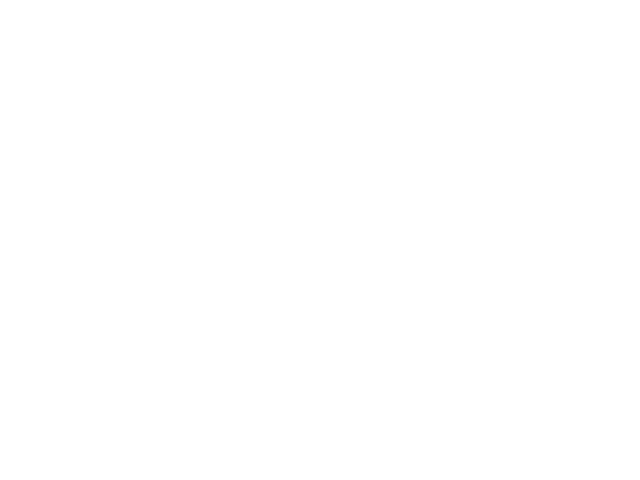

<IPython.core.display.Javascript object>


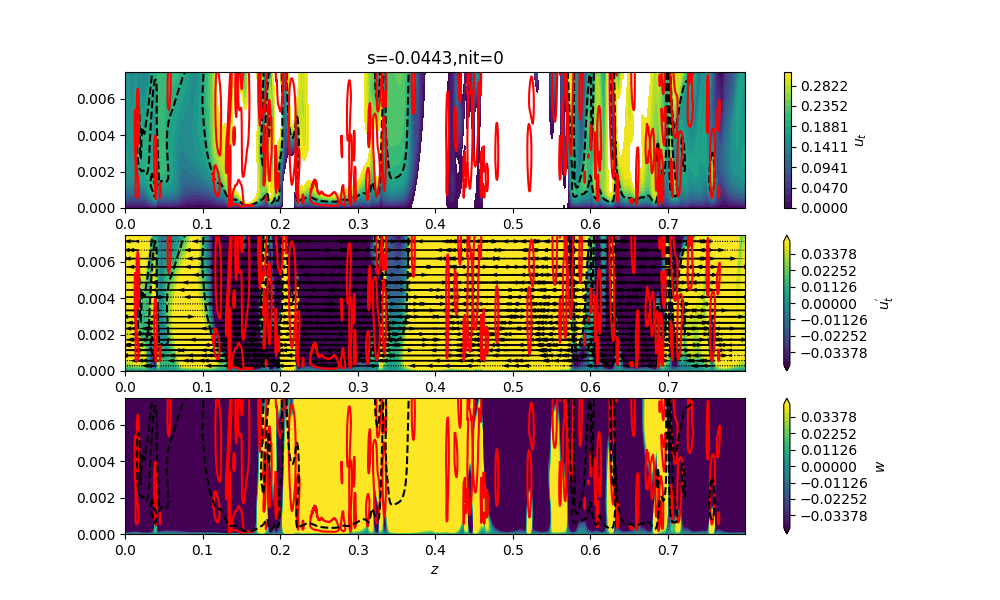

<IPython.core.display.Javascript object>


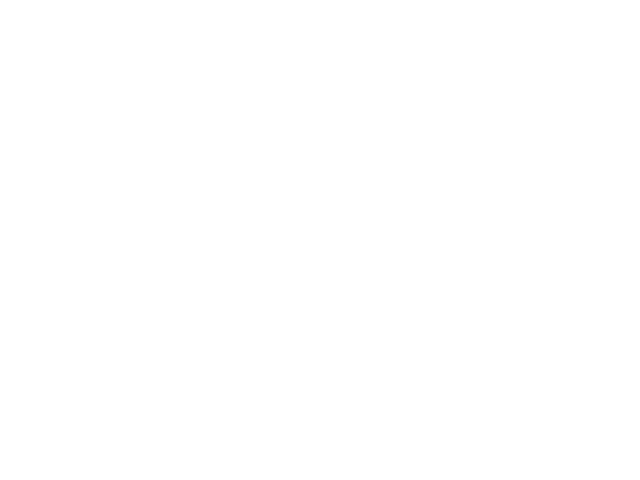

<IPython.core.display.Javascript object>


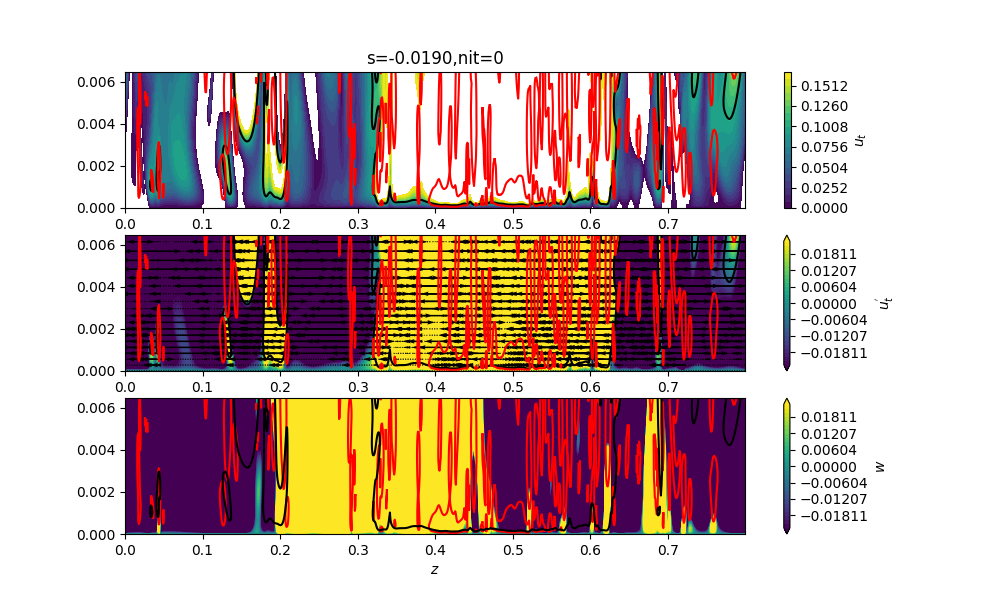

<IPython.core.display.Javascript object>


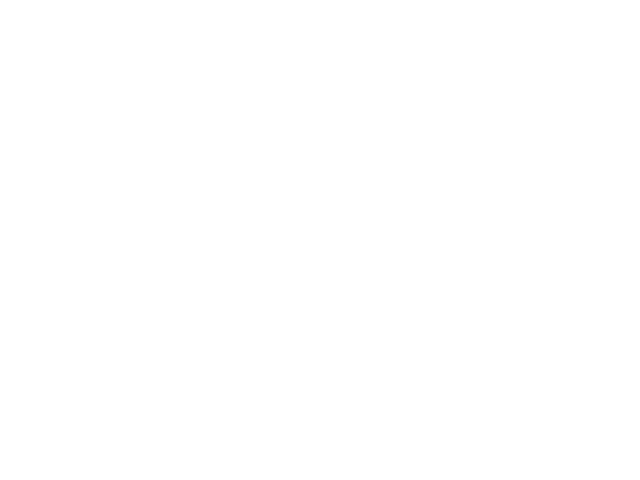

<IPython.core.display.Javascript object>


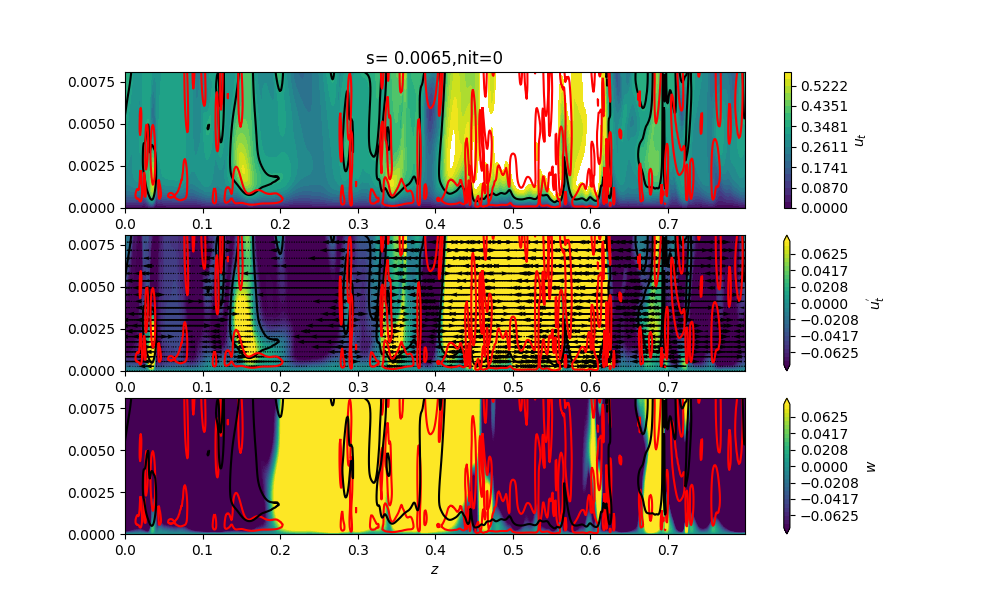

<IPython.core.display.Javascript object>


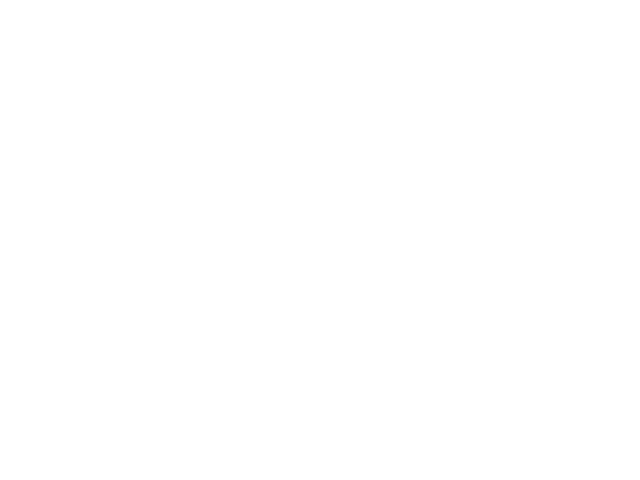

<IPython.core.display.Javascript object>


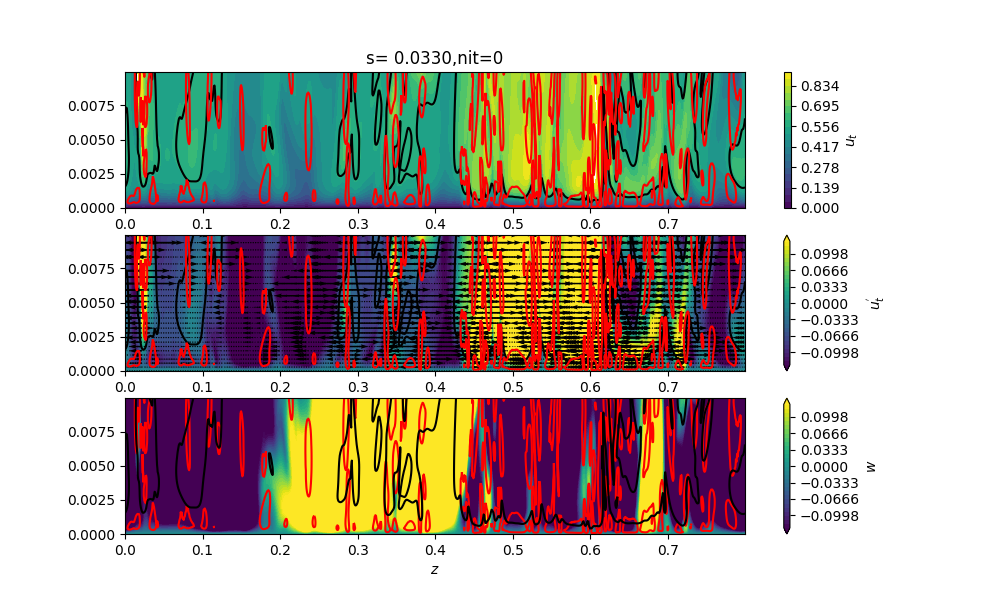

<IPython.core.display.Javascript object>


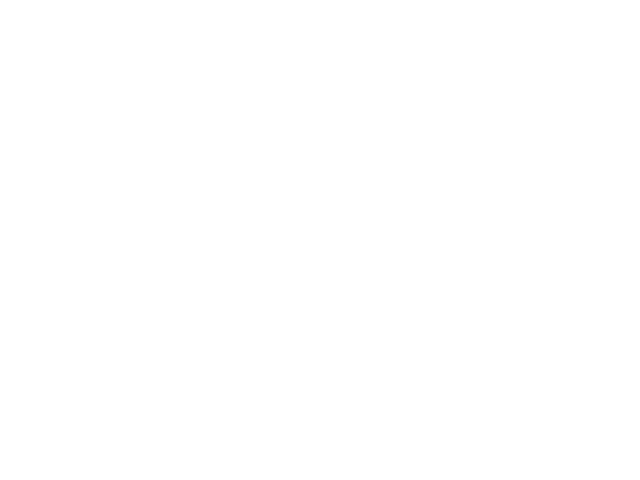

<IPython.core.display.Javascript object>


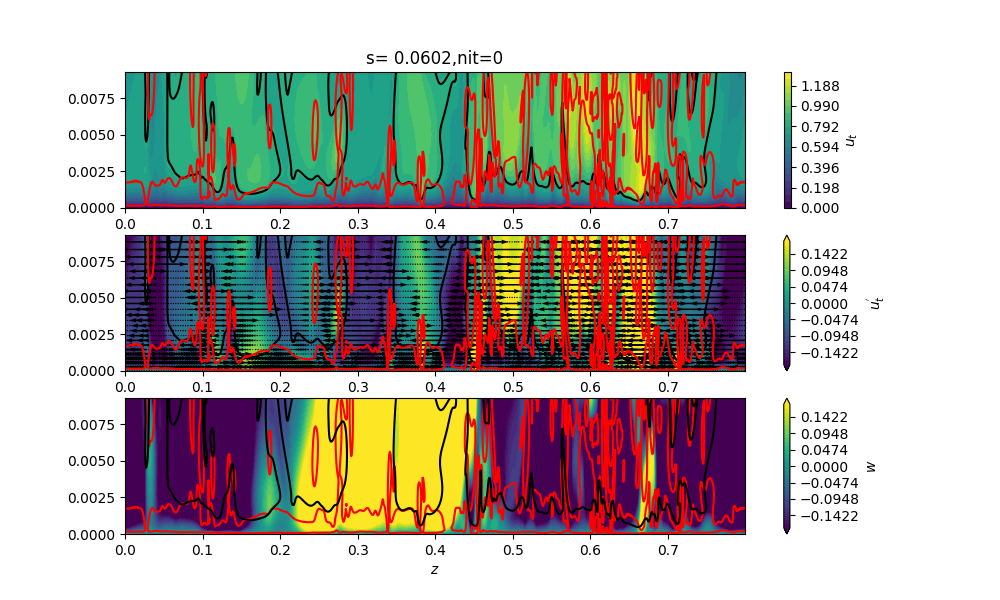

<IPython.core.display.Javascript object>


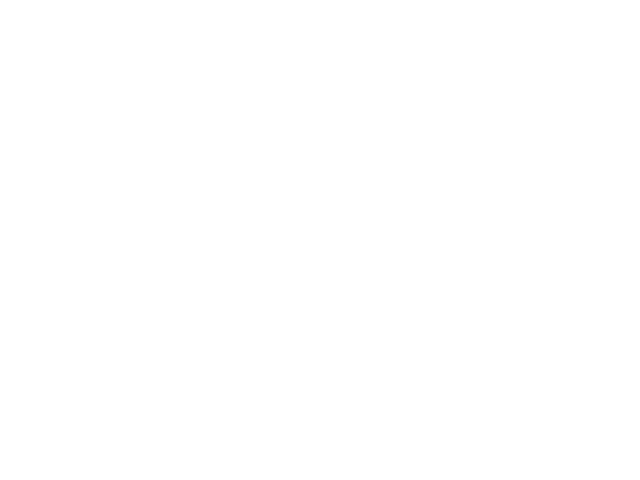

<IPython.core.display.Javascript object>


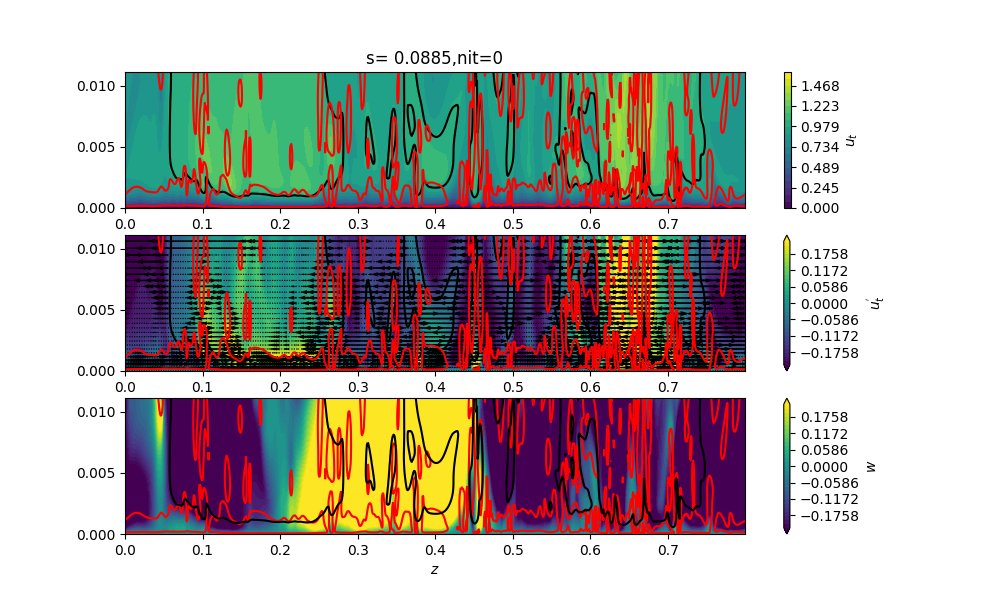

<IPython.core.display.Javascript object>


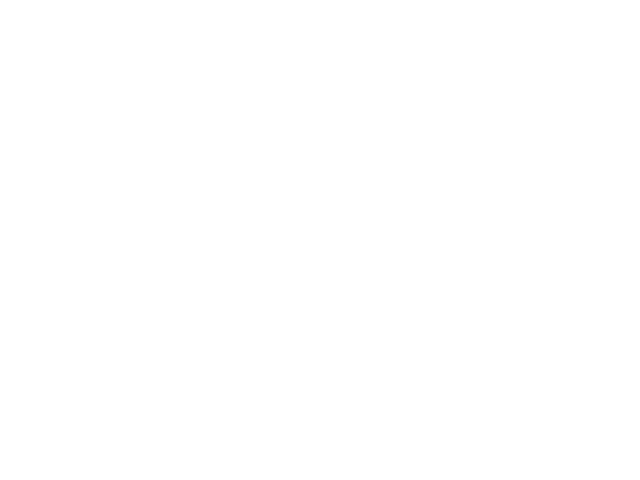

<IPython.core.display.Javascript object>


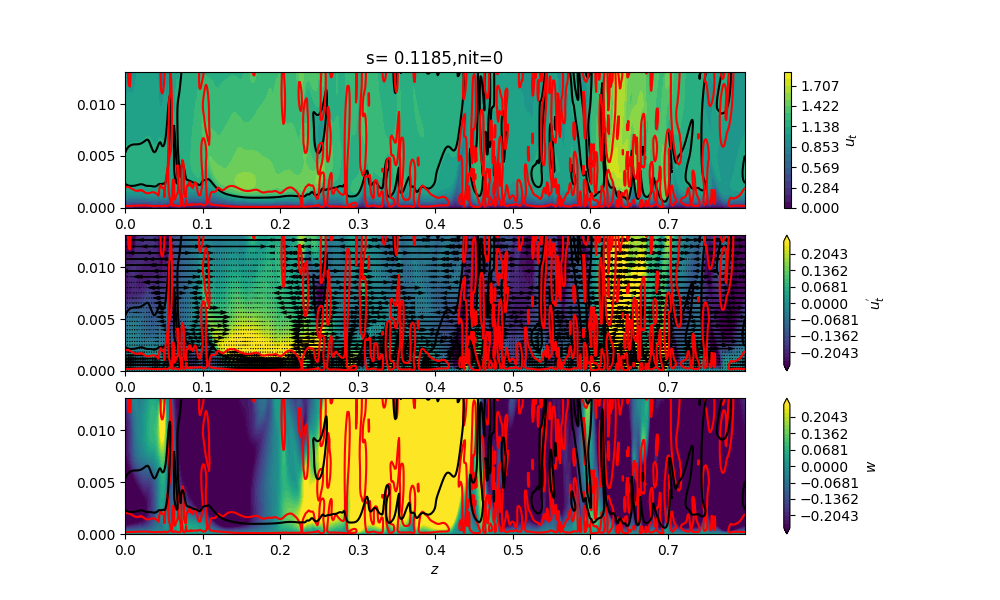

<IPython.core.display.Javascript object>


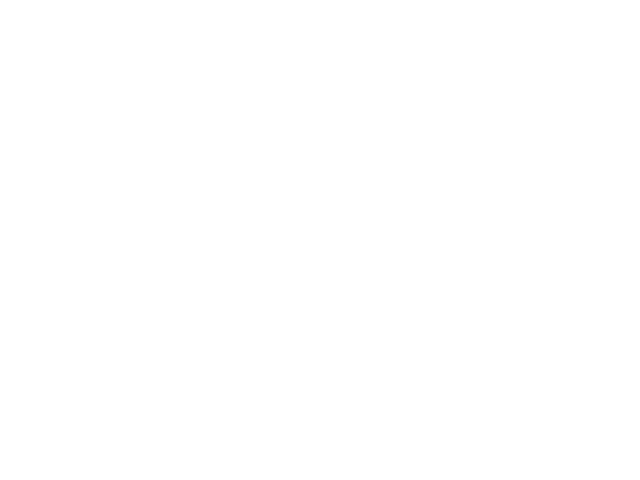

<IPython.core.display.Javascript object>


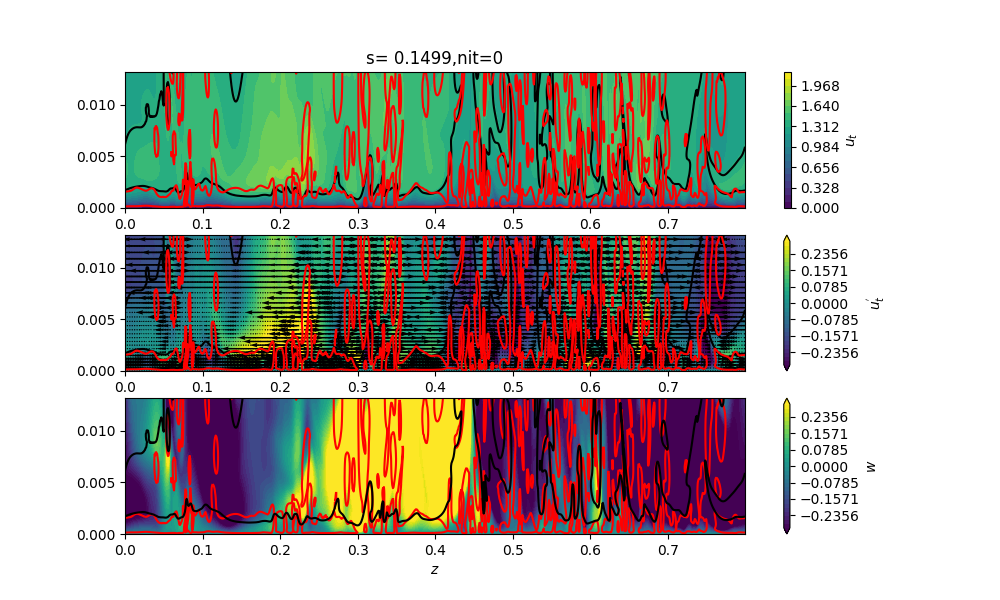

In [18]:
for nit in range(1):
    for ib in range(1):
        nx,ny,nz=turned_1.header[0][ib]    
        for j_val in range(ny):
            plt.figure()
    #         plt.axes(aspect=1.)
    #         plt.plot(turned_1.grid[ib][0,0,:,0],turned_1.grid[ib][1,0,:,0])
    #         plt.plot(turned_1.grid[ib][0,0,j_val,0],turned_1.grid[ib][1,0,j_val,0],'x')
            i_temp=bl_ind[ib][j_val]
            ylim_t=turned_1.data[ib][1,0,i_temp,j_val,0]*3.
            fig=plt.figure(figsize=(10,6))  
            ax1 = plt.subplot2grid((3,10), (0,0),colspan=10)
            if u_t_max[ib][j_val]<0:
                one_temp=-1.
            else:
                one_temp=1.            
            cb1=ax1.contourf(turned_1.grid[ib][2,:,j_val,:],turned_1.data[ib][1,0,:,j_val,:]
                             ,one_temp*turned_1.data[ib][2,nit,:,j_val,:]
                             ,levels=np.linspace(0,abs(u_t_max[ib][j_val]*1.5),num=21))
            plt.colorbar(cb1,label='$u_t$')
            plt.title('s=%7.4f,nit=%i'%(dist_red[ib][j_val],nit))
    #        ax1.contour(turned_1.grid[ib][2,:,j_val,:],turned_1.data[ib][1,0,:,j_val,:],turned_1.data[ib][2,0,:,j_val,:]
    #                     ,levels=[u_t_max[ib][j_val]],color='k')
            ax1.contour(turned_1.grid[ib][2,:,j_val,:],turned_1.data[ib][1,0,:,j_val,:],turned_1.data[ib][2,nit,:,j_val,:]
                         ,levels=[u_t_max[ib][j_val]*0.9/0.99],colors=['k'])
            ax1.contour(turned_1.grid[ib][2,:,j_val,:],turned_1.data[ib][1,0,:,j_val,:],turned_1.data[ib][11,nit,:,j_val,:]
                         ,levels=[500],colors=['r'])    
            ax1.set_ylim([0.,ylim_t])
            ax2 = plt.subplot2grid((3,10), (1,0),colspan=10)
            ten_percent_u_t=abs(u_t_max[ib][j_val]*0.2/0.99)
            cb2=ax2.contourf(turned_1.grid[ib][2,:,j_val,:],turned_1.data[ib][1,0,:,j_val,:],turned_1.data[ib][4,nit,:,j_val,:]
                         ,levels=np.linspace(-ten_percent_u_t,ten_percent_u_t,num=31),extend='both')
            ax2.set_ylim([0.,ylim_t])
            plt.colorbar(cb2,label="$u_t^{'}$")
            ax2.contour(turned_1.grid[ib][2,:,j_val,:],turned_1.data[ib][1,0,:,j_val,:],turned_1.data[ib][2,nit,:,j_val,:]
                         ,levels=[u_t_max[ib][j_val]*0.9/0.99],colors=['k'])        
            ax2.contour(turned_1.grid[ib][2,:,j_val,:],turned_1.data[ib][1,0,:,j_val,:],turned_1.data[ib][11,nit,:,j_val,:]
                         ,levels=[500],colors=['r'])  
            ax2.quiver(turned_1.grid[ib][2,::2,j_val,::4],turned_1.data[ib][1,0,::2,j_val,::4]
                       ,turned_1.data[ib][11,nit,::2,j_val,::4],turned_1.data[ib][3,nit,::2,j_val,::4]
                         ,scale=100000)          
            ax3 = plt.subplot2grid((3,10), (2,0),colspan=10)
            #ax3.set_aspect(1.)
            cb3=ax3.contourf(turned_1.grid[ib][2,:,j_val,:],turned_1.data[ib][1,0,:,j_val,:],turned_1.data[ib][10,nit,:,j_val,:]
                         ,levels=np.linspace(-ten_percent_u_t,ten_percent_u_t,num=31),extend='both')
            plt.colorbar(cb3,label=r"$w$")
            ax3.contour(turned_1.grid[ib][2,:,j_val,:],turned_1.data[ib][1,0,:,j_val,:],turned_1.data[ib][11,nit,:,j_val,:]
                         ,levels=[500],colors=['r'])      
            ax3.set_ylim([0.,ylim_t])   
            ax3.contour(turned_1.grid[ib][2,:,j_val,:],turned_1.data[ib][1,0,:,j_val,:],turned_1.data[ib][2,nit,:,j_val,:]
                         ,levels=[u_t_max[ib][j_val]*0.9/0.99],colors=['k'])                
            ax3.set_xlabel('$z$')
            plt.savefig('../video_planes/plane_time_laps_u_t_ib%i_j%i_time%i.png'%(ib,j_val,steps[nit]))